# Least Squares Method with Keras Mod-4thOrder-Loop
### Kerasを使った最小自乗法
次数を４にした場合でのループ版

注意：このノートブックはPython3および(GPUを用いない)CPU環境で動作するように設定されています。<br>
Google Colab環境にてオンラインで実行する場合、オリジナルサイトのコードを使って下さい。<br>
GPUの有無に関わらずPython 3.x および　TensorFlow 2.xにて1.x環境を実行可能にする設定（ないしTensorFlow 1.x） にて、オフラインにて稼動するよう変更しています。<br>
2020/02/04: By H.Nishiyama<br>
2021/10/12 追加・変更部分のみ日本語化<br>
2021/10/26 データを変更し、ループ版に改造<br>

このノートブックはTensorFlow 2.x (ないし1.x）を使います<br>
【オリジナルサイト】https://github.com/enakai00/colab_tfbook<br>
オリジナルではTensorFlow 2.x を対象としています。<br>
[LSM-08] にて100000回繰り返す部分、数分以上は何の応答もなくなるので、5000回のエポック単位でパラメータを引き継ぎながら20回繰り返す方式に変更し、途中経過を確認可能にしました。過学習を含めた変化が分かりやすいようにデータを差し替えています。<br>
併せて、モデルを次数を2から5まで変化させた版も追加しました。<br>
参考）<br>
https://suzulang.com/tensorflow-2-keras-get-weight-set-weight-1/<br>

In [1]:
#--- Google Colabを使う場合、下記のコメントを外す
###%tensorflow_version 2.x

#### [LSM-01]
Import modules.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from pandas import DataFrame

from tensorflow.keras import layers, models

#### [LSM-02]
Prepare the training dateset.

In [3]:
#=== Add "order" and Change from original code
order = 4
train_t = np.array([4.1,3.5,5.6,9.8,8.4,8.1,12.5,14.2,10.3,8.1,7.1,8.6])
train_t = train_t.reshape([12, 1])
train_x = np.array([[mon**n for n in range(1, order+1)]
                    for mon in range(1, 13)])

#### [LSM-03]
`train_x` contains the list $[x, x^2, x^3, x^4]$ for $x=1,...,12$.

In [4]:
train_x

array([[    1,     1,     1,     1],
       [    2,     4,     8,    16],
       [    3,     9,    27,    81],
       [    4,    16,    64,   256],
       [    5,    25,   125,   625],
       [    6,    36,   216,  1296],
       [    7,    49,   343,  2401],
       [    8,    64,   512,  4096],
       [    9,    81,   729,  6561],
       [   10,   100,  1000, 10000],
       [   11,   121,  1331, 14641],
       [   12,   144,  1728, 20736]])

#### [LSM-04]
`train_t` contins the corresponding lables for $x=1,...,12$.

In [5]:
train_t

array([[ 4.1],
       [ 3.5],
       [ 5.6],
       [ 9.8],
       [ 8.4],
       [ 8.1],
       [12.5],
       [14.2],
       [10.3],
       [ 8.1],
       [ 7.1],
       [ 8.6]])

#### [LSM-05]
Define a model to predict labels using a polynomal function.<br>
*Waring will be occured for some version of TensorFlow as follows;<br>
WARNING:tensorflow:From ...

In [6]:
model = models.Sequential()
model.add(layers.Dense(1, input_shape=(order,), name='polynomial'))
#    model.add(layers.Dense(1, input_shape=(order,), name='polynomial', kernel_initializer=my_k_init, bias_initializer=my_b_init))
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
polynomial (Dense)           (None, 1)                 5         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


#### [LSM-06]
Compile the model using the Adam optimizer, and MSE (Mean Square Error) as a loss function.<br>
*Waring will be occured for some version of TensorFlow as follows;<br>
WARNING:tensorflow:From ...

In [7]:
model.compile(optimizer='adam', loss='mse')


#### [LSM-07]
Apply the optimization for 10 epochs.<br>
*Waring will be occured for some version of TensorFlow as follows;<br>
WARNING:tensorflow:From ...

In [8]:
history = model.fit(train_x, train_t, batch_size=12, epochs=10)

Epoch 1/10
1/1 [==============================] - 1s 527ms/step - loss: 55937996.0000
Epoch 2/10
1/1 [==============================] - 0s 11ms/step - loss: 55802752.0000
Epoch 3/10
1/1 [==============================] - 0s 3ms/step - loss: 55667692.0000
Epoch 4/10
1/1 [==============================] - 0s 3ms/step - loss: 55532800.0000
Epoch 5/10
1/1 [==============================] - 0s 4ms/step - loss: 55398084.0000
Epoch 6/10
1/1 [==============================] - 0s 4ms/step - loss: 55263548.0000
Epoch 7/10
1/1 [==============================] - 0s 3ms/step - loss: 55129188.0000
Epoch 8/10
1/1 [==============================] - 0s 3ms/step - loss: 54995008.0000
Epoch 9/10
1/1 [==============================] - 0s 4ms/step - loss: 54861012.0000
Epoch 10/10
1/1 [==============================] - 0s 4ms/step - loss: 54727212.0000


#### [LSM-08]以降
追加で5000エポック単位にて15回繰り返す。<br>
オリジナルコードでは一気に10万回繰り返すため、数分以上レスポンス無いままであり分割した。<br>
分割することで、エポック数の増加に伴う回帰曲線の変化が分かり易くなった。<br>
historyをリセットするために、とりあえず強引に再コンパイルしているが良い方法見つかれば変更予定<br>

#### モデルのパラメータ取り出し

In [9]:
mw = model.get_weights()

#### 繰り返す回数と1回あたりのエポック数の設定

In [10]:
step = 5000
repeat = 20

#### モデルのパラメータを1時待避し、モデル初期化後にパラメータを差し戻して繰り返す。

at #1: 5000 epochs
[[-0.24214739]
 [-1.3657851 ]
 [ 0.05175284]
 [ 0.00759919]]
[-0.68734205]


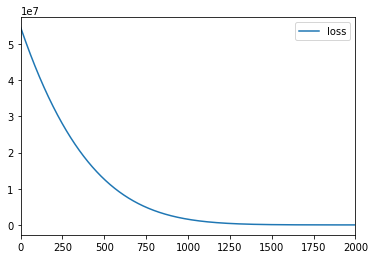

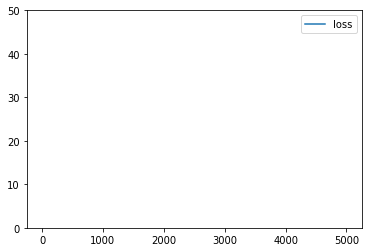

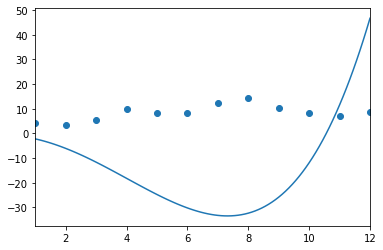

at #2: 10000 epochs
[[ 1.7015681 ]
 [-0.40827993]
 [ 0.07892577]
 [-0.00455431]]
[1.9758943]


<Figure size 432x288 with 0 Axes>

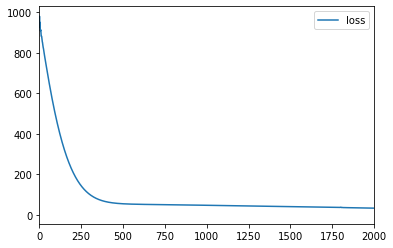

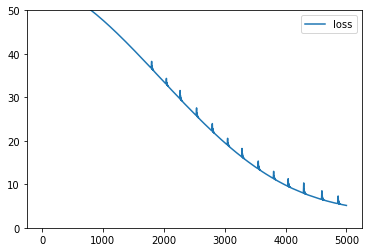

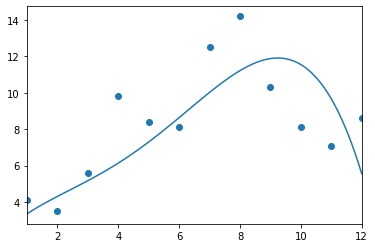

at #3: 15000 epochs
[[ 2.2703602e+00]
 [-1.8984596e-01]
 [ 1.4146672e-02]
 [-9.8771427e-04]]
[1.3245622]


<Figure size 432x288 with 0 Axes>

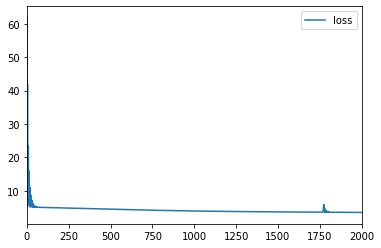

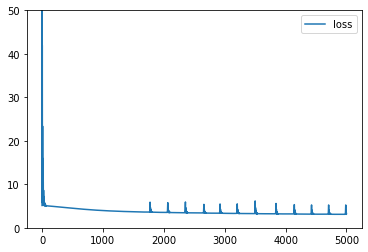

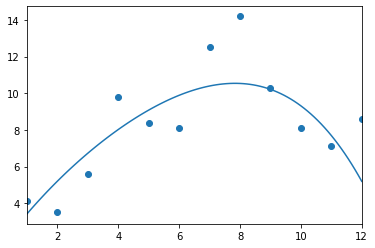

at #4: 20000 epochs
[[ 2.3412321e+00]
 [-8.9242585e-02]
 [-5.9411228e-03]
 [ 7.4517731e-05]]
[0.623677]


<Figure size 432x288 with 0 Axes>

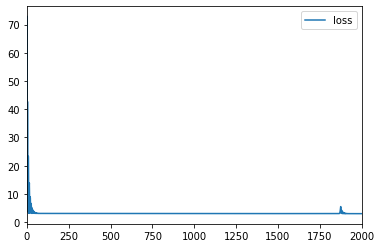

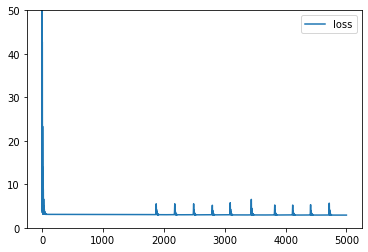

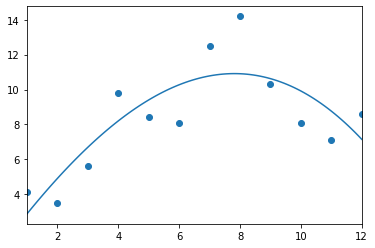

at #5: 25000 epochs
[[ 2.2963581e+00]
 [-2.5722891e-02]
 [-1.6735410e-02]
 [ 5.7425344e-04]]
[0.40764597]


<Figure size 432x288 with 0 Axes>

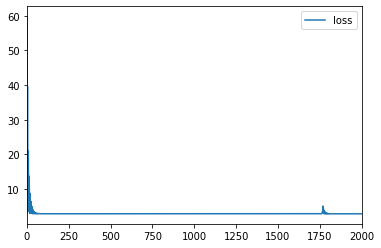

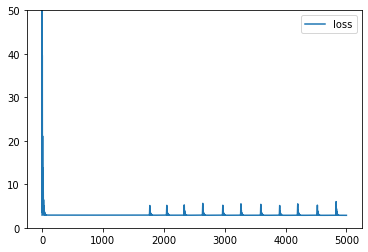

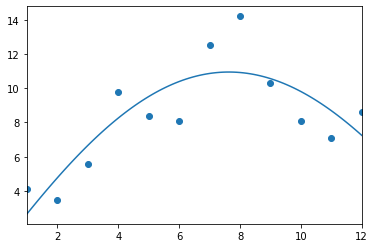

at #6: 30000 epochs
[[ 2.2052734e+00]
 [ 2.1008082e-02]
 [-2.3396134e-02]
 [ 8.6056080e-04]]
[0.3927696]


<Figure size 432x288 with 0 Axes>

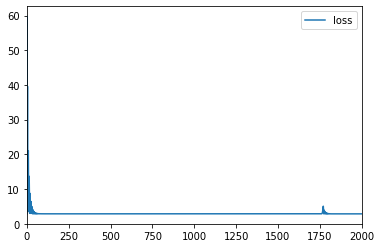

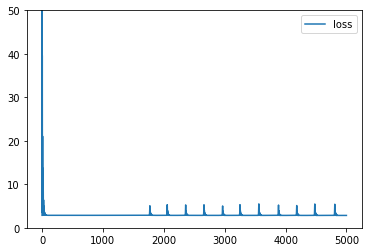

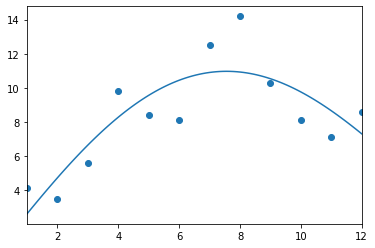

at #7: 35000 epochs
[[ 2.1008532e+00]
 [ 5.8926672e-02]
 [-2.8127415e-02]
 [ 1.0500121e-03]]
[0.45628622]


<Figure size 432x288 with 0 Axes>

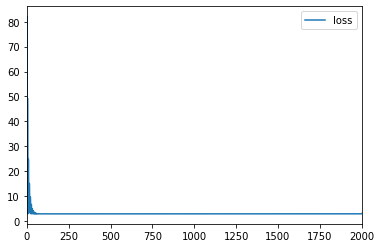

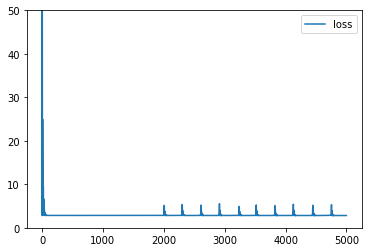

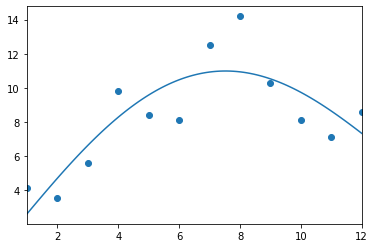

at #8: 40000 epochs
[[ 1.9878469e+00]
 [ 9.5822647e-02]
 [-3.2478597e-02]
 [ 1.2189912e-03]]
[0.54633796]


<Figure size 432x288 with 0 Axes>

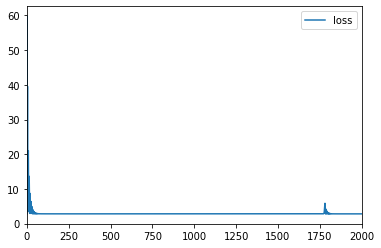

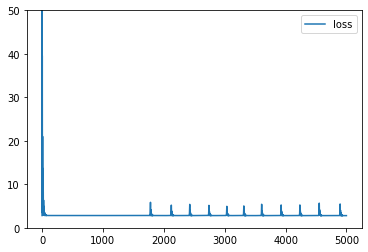

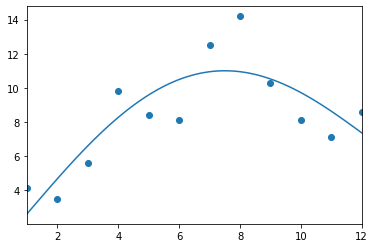

at #9: 45000 epochs
[[ 1.8797792e+00]
 [ 1.2818049e-01]
 [-3.6098305e-02]
 [ 1.3534070e-03]]
[0.6475002]


<Figure size 432x288 with 0 Axes>

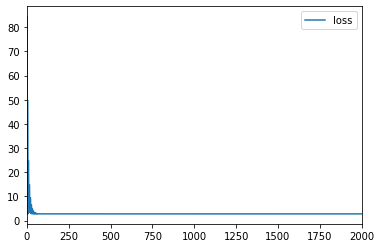

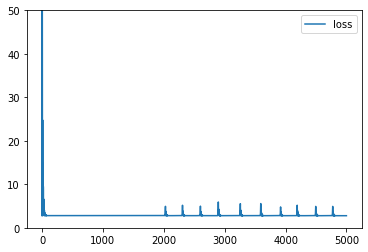

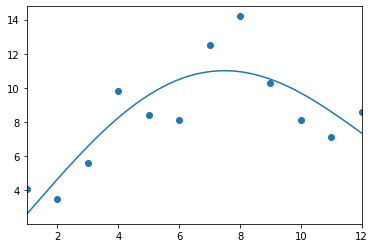

at #10: 50000 epochs
[[ 1.7664651e+00]
 [ 1.6302474e-01]
 [-3.9875232e-02]
 [ 1.6568233e-03]]
[0.7502073]


<Figure size 432x288 with 0 Axes>

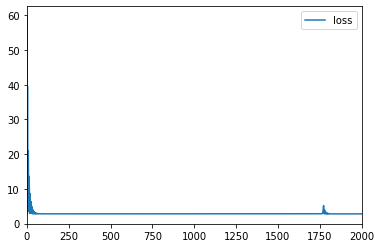

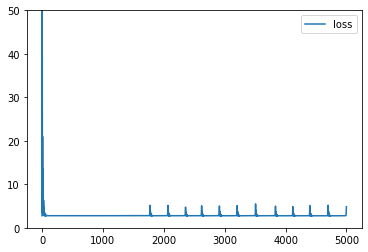

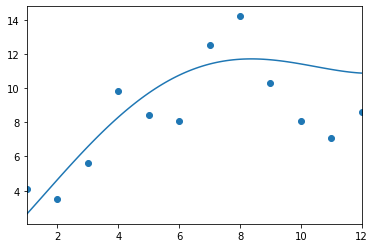

at #11: 55000 epochs
[[ 1.6556205e+00]
 [ 1.9513269e-01]
 [-4.3574557e-02]
 [ 1.6316223e-03]]
[0.8581962]


<Figure size 432x288 with 0 Axes>

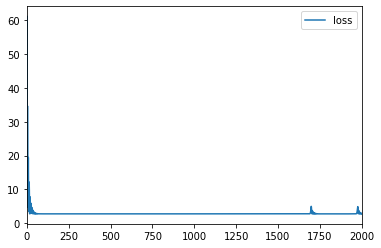

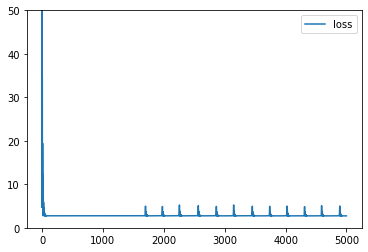

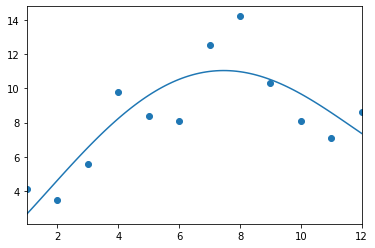

at #12: 60000 epochs
[[ 1.55061   ]
 [ 0.22590479]
 [-0.04696849]
 [ 0.00175546]]
[0.95994127]


<Figure size 432x288 with 0 Axes>

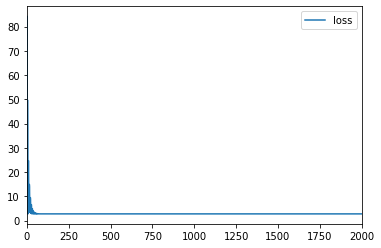

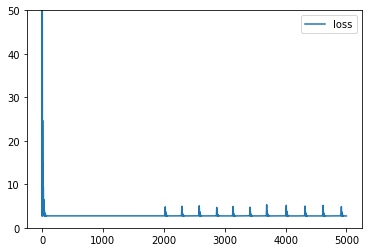

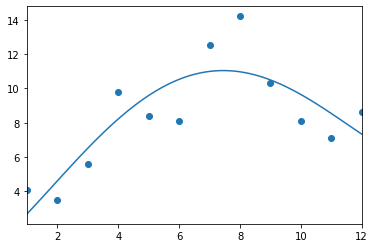

at #13: 65000 epochs
[[ 1.4487883 ]
 [ 0.25601676]
 [-0.05030613]
 [ 0.00188135]]
[1.0572125]


<Figure size 432x288 with 0 Axes>

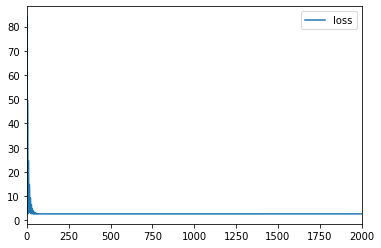

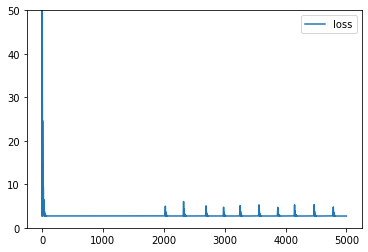

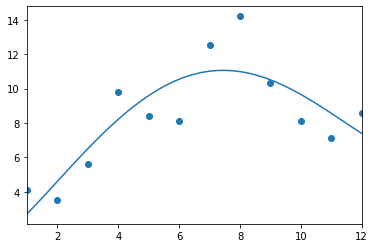

at #14: 70000 epochs
[[ 1.3456274 ]
 [ 0.28686845]
 [-0.05375389]
 [ 0.00200991]]
[1.1539764]


<Figure size 432x288 with 0 Axes>

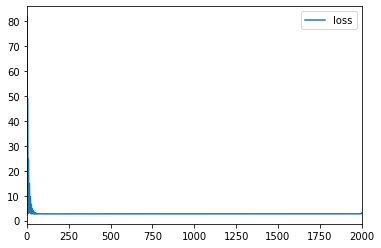

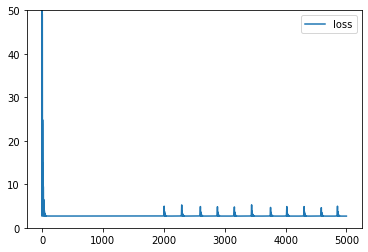

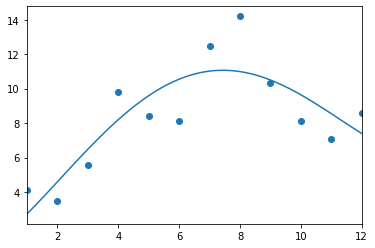

at #15: 75000 epochs
[[ 1.2455457 ]
 [ 0.31630012]
 [-0.05687764]
 [ 0.00223554]]
[1.2513393]


<Figure size 432x288 with 0 Axes>

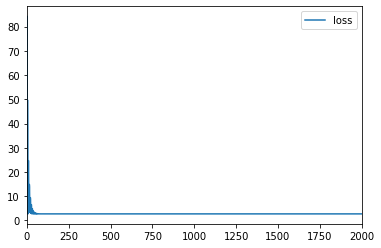

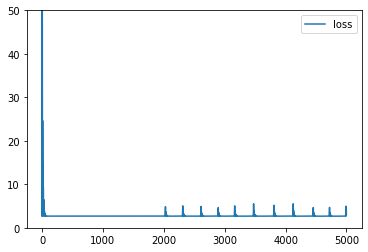

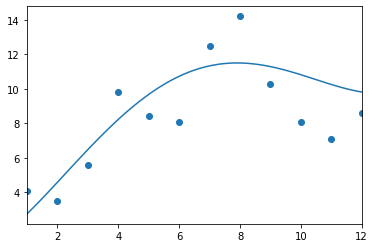

at #16: 80000 epochs
[[ 1.1451955 ]
 [ 0.34581324]
 [-0.06028042]
 [ 0.00224033]]
[1.3470201]


<Figure size 432x288 with 0 Axes>

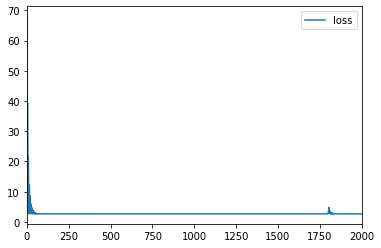

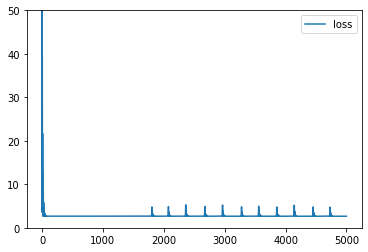

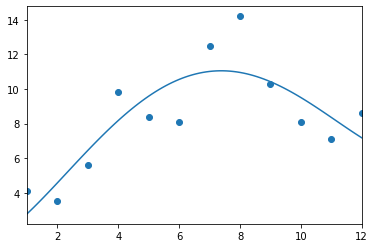

at #17: 85000 epochs
[[ 1.0492322 ]
 [ 0.37420636]
 [-0.06341797]
 [ 0.0023678 ]]
[1.4387001]


<Figure size 432x288 with 0 Axes>

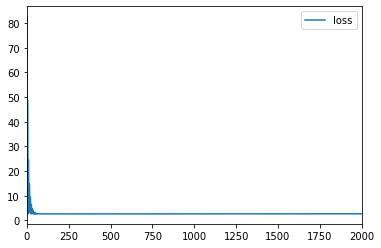

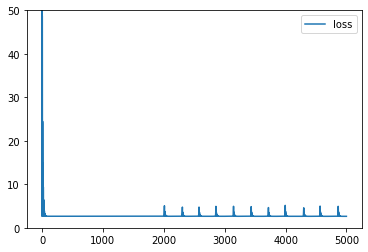

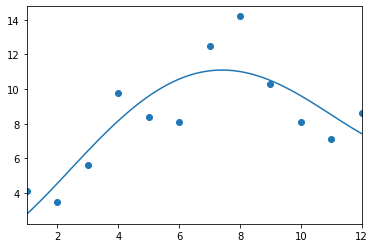

at #18: 90000 epochs
[[ 0.95368385]
 [ 0.40236026]
 [-0.06653232]
 [ 0.00248381]]
[1.5304983]


<Figure size 432x288 with 0 Axes>

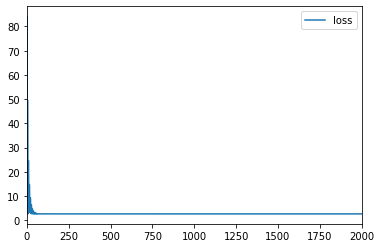

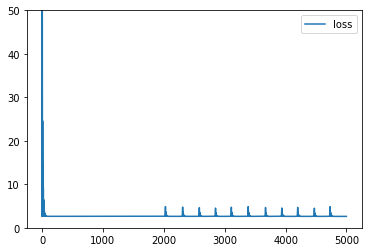

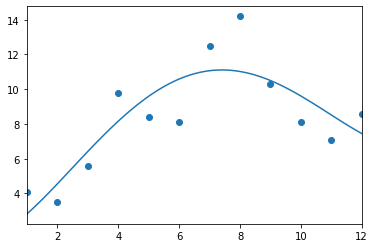

at #19: 95000 epochs
[[ 0.8609097 ]
 [ 0.42982152]
 [-0.06958079]
 [ 0.00259645]]
[1.6189756]


<Figure size 432x288 with 0 Axes>

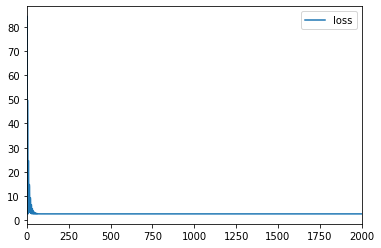

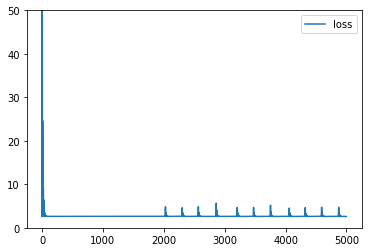

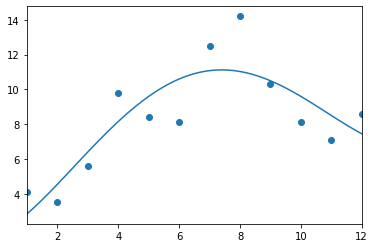

at #20: 100000 epochs
[[ 0.76707035]
 [ 0.45795292]
 [-0.07274663]
 [ 0.00270001]]
[1.7065288]


<Figure size 432x288 with 0 Axes>

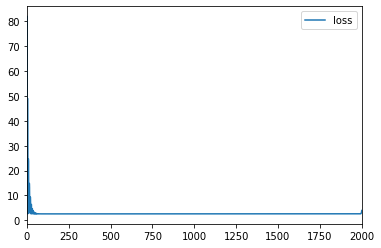

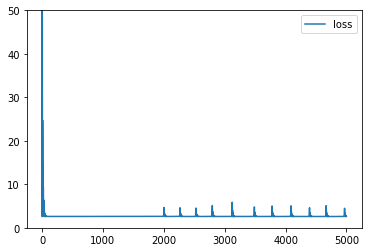

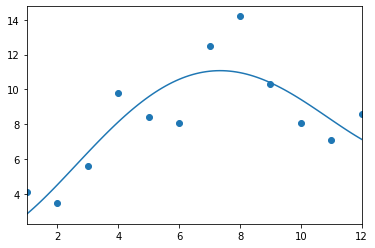

<Figure size 432x288 with 0 Axes>

In [11]:
for num in range(1,repeat+1):
    model.set_weights(mw)
    model.compile(optimizer='adam', loss='mse')
    history = model.fit(train_x, train_t,
                    batch_size=12, epochs=step, verbose=0)
    mw = model.get_weights()
    w, b = model.get_weights()

    print("at #{}: {} epochs".format(num,num * 5000))
    print(w)
    print(b)
    DataFrame({'loss': history.history['loss']}).plot(xlim=(0, 2000))
    DataFrame({'loss': history.history['loss']}).plot(ylim=(0,50))

    def predict(x):
        pred = b[0] + sum([w[n][0] * x**(n+1) for n in range(0, order)])
        return pred

    fig = plt.figure()
    subplot = fig.add_subplot(1, 1, 1)
    subplot.set_xlim(1, 12)
    subplot.scatter(range(1, 13), train_t)
    xs = np.linspace(1, 12, 100)
    ys = predict(xs)
    subplot.plot(xs, ys)
    plt.show()
    plt.clf()